# Binary User-Item Interaction Matrix

A **binary user-item interaction matrix** is a matrix where each row represents a user, and each column represents an item. The values in the matrix are binary ($0$ or $1$), where:

- $1$ indicates that the user has interacted with the item (e.g., viewed, liked, purchased).
- $0$ indicates no interaction with the item.

Let there be $m$ users and $n$ items. The matrix $A$ is a binary user-item interaction matrix of size $m \times n$, where:

- Each row corresponds to a user.
- Each column corresponds to an item.
- The values in $A$ are binary ($0$ or $1$), indicating whether a user has interacted with an item.

---

## Example

Let’s consider $3$ users and $4$ items.

| User/Item | Item 1 | Item 2 | Item 3 | Item 4 |
|-----------|--------|--------|--------|--------|
| User 1    | 1      | 0      | 1      | 0      |
| User 2    | 0      | 1      | 1      | 1      |
| User 3    | 1      | 1      | 0      | 1      |

In this example:
- **User 1** interacted with **Item 1** and **Item 3**.
- **User 2** interacted with **Item 2**, **Item 3**, and **Item 4**.
- **User 3** interacted with **Item 1**, **Item 2**, and **Item 4**.

---

## Representing it with an Adjacency Matrix

The binary user-item interaction matrix $A$ is similar to an **adjacency matrix** in graph theory, where:
- **Users** can be seen as **nodes** in one set (e.g., left side).
- **Items** can be seen as **nodes** in another set (e.g., right side).
- **Edges** between the user nodes and item nodes are represented by a $1$ if the user interacted with that item, and $0$ if there was no interaction.

The adjacency matrix would look exactly the same as the binary interaction matrix $A$:

| User/Item | Item 1 | Item 2 | Item 3 | Item 4 |
|-----------|--------|--------|--------|--------|
| User 1    | 1      | 0      | 1      | 0      |
| User 2    | 0      | 1      | 1      | 1      |
| User 3    | 1      | 1      | 0      | 1      |

In this case, each row of the matrix corresponds to an edge from a user to an item, showing which items are connected (interacted with) by which users.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [2]:
A = np.array([
    [1, 0, 1, 0, 1],  # User 1
    [0, 1, 1, 1, 0],  # User 2
    [1, 1, 0, 1, 1],  # User 3
    [0, 0, 1, 1, 0]   # User 4
])

In [3]:
userlabels = ["User 1", "User 2", "User 3", "User 4"]
itemlabels = ["Item 1", "Item 2", "Item 3", "Item 4", "Item 5"]

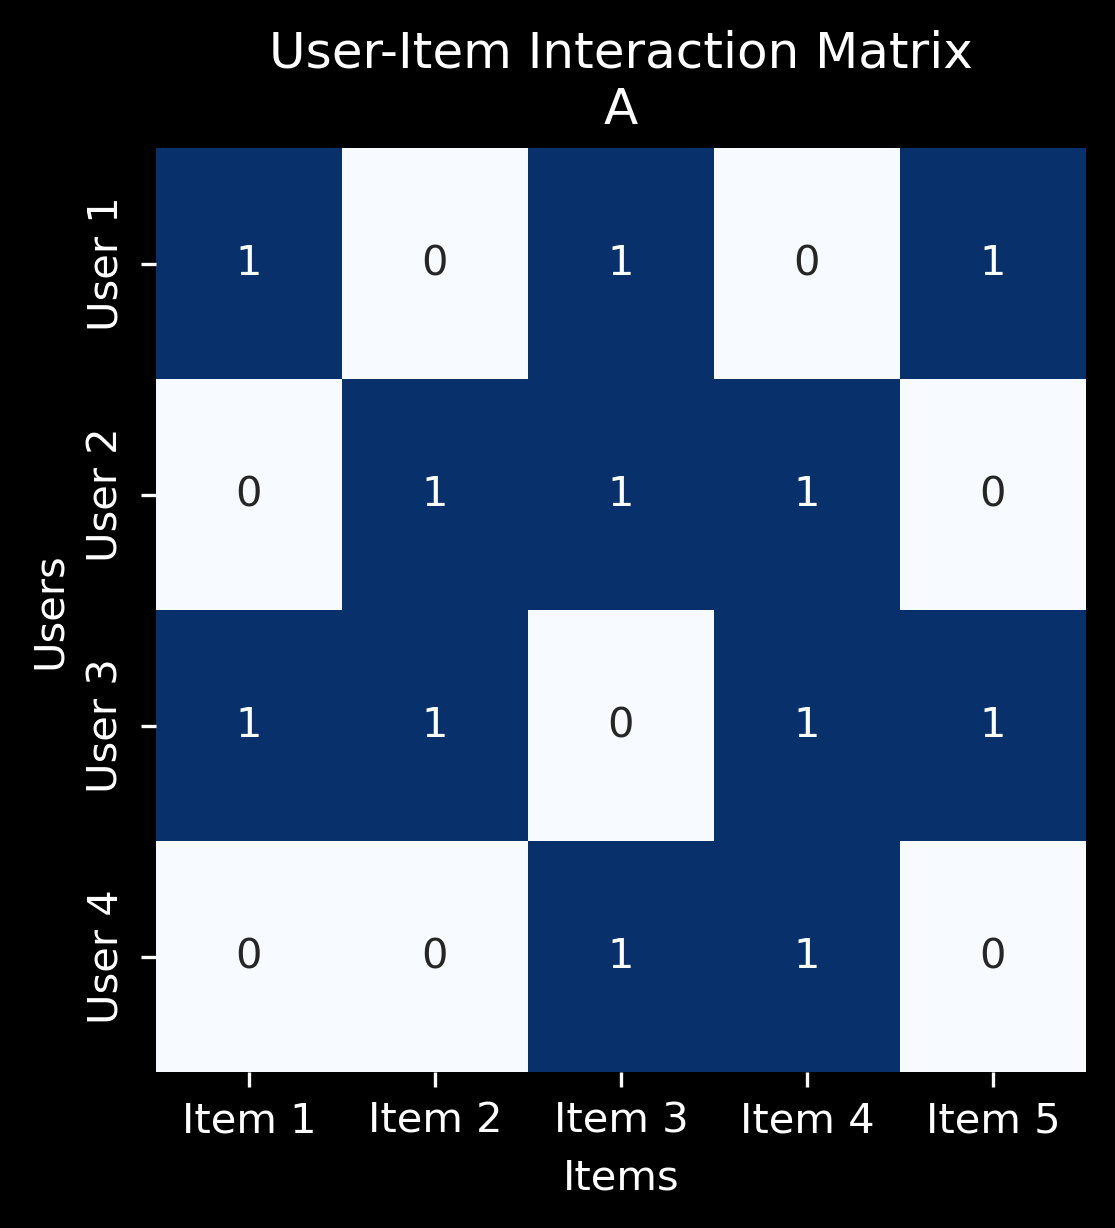

In [4]:
plt.figure(figsize=(4, 4), dpi=300)
sns.heatmap(A, annot=True, cmap="Blues", 
            xticklabels=itemlabels, 
            yticklabels=userlabels, 
            cbar=False)

plt.title("User-Item Interaction Matrix\nA")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()

## User-User Similarity Matrix

The **user-user Similarity matrix** represents the relationship between users based on the items they have interacted with. The matrix captures how similar users are in terms of the items they have interacted with.

The mathematical formula for the user-user interaction matrix $U$ is:

$ U = A A^T $

Where:
- $A$ is the binary user-item interaction matrix.
- $A^T$ is the transpose of the user-item interaction matrix.

---

### Explanation of the Matrix

- The diagonal cell, $U_{ii}$, represents the total number of items with which the $i$-th user has interacted. It is the sum of interactions across all items for user $i$.
- The off-diagonal cell, $U_{ij}$, represents the number of common items both users $i$ and $j$ have interacted with. It is the dot product of the $i$-th and $j$-th rows of the binary user-item interaction matrix.

This matrix is used to measure the similarity between users based on their shared interactions with items.


In [5]:
U = A @ A.T
print("\nUser-User Similarity Matrix (AA'):\n", U)


User-User Similarity Matrix (AA'):
 [[3 1 2 1]
 [1 3 2 2]
 [2 2 4 1]
 [1 2 1 2]]


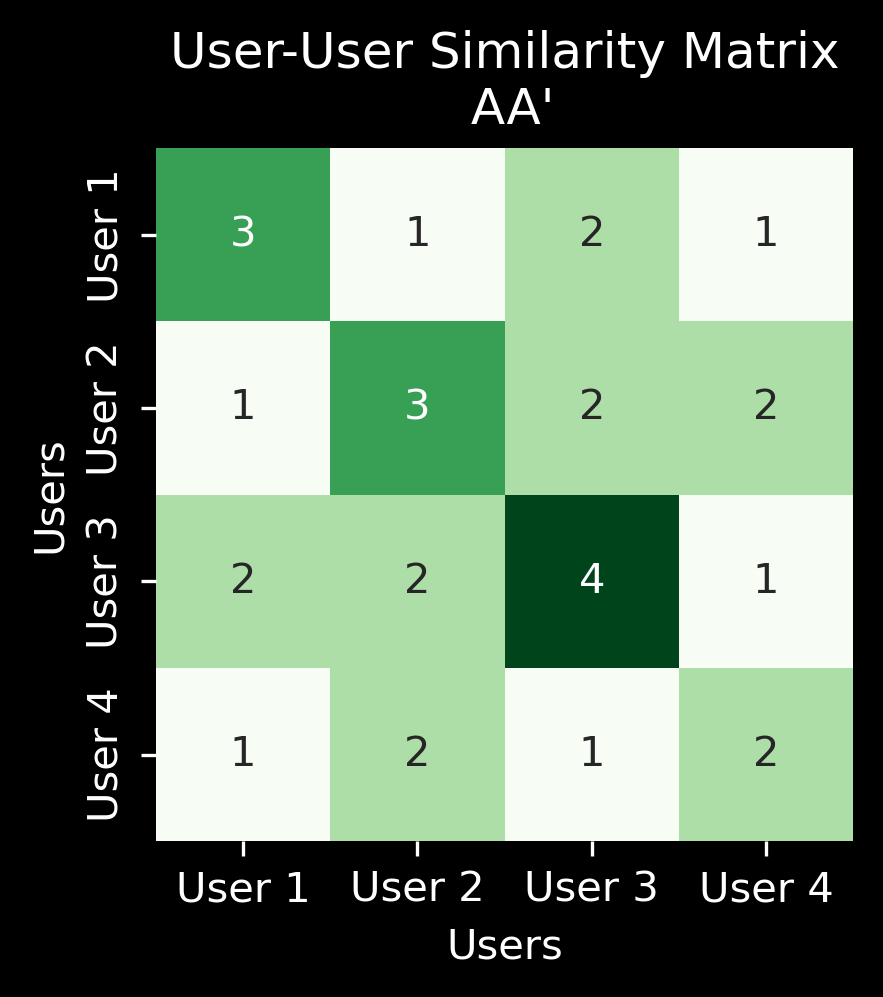

In [6]:
plt.figure(figsize=(3, 3), dpi=300)
sns.heatmap(U, annot=True, cmap="Greens", xticklabels=userlabels, 
            yticklabels=userlabels, cbar=False)
plt.title("User-User Similarity Matrix\n AA'")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()

## Item-Item Co-occurrence Matrix

The **item-item co-occurrence matrix** is used to capture how often pairs of items are interacted with together. This matrix is typically derived from a binary user-item interaction matrix, where each element represents the number of times items have co-occurred in the same user's interaction history.

The mathematical formula for the item-item co-occurrence matrix $I$ is:

$$ I = A^T A $$

Where:
- $A$ is the binary user-item interaction matrix.
- $A^T$ is the transpose of the user-item interaction matrix.

---

### Explanation of the Matrix

- The diagonal cell, $I_{ii}$, represents the total number of times the $i$-th item has been interacted with. It is the sum of interactions across all users for item $i$.
- The off-diagonal cell, $I_{ij}$, represents the number of common users who have interacted with both items $i$ and $j$. It is the dot product of the $i$-th and $j$-th rows of the binary user-item interaction matrix.

This matrix helps identify which items are frequently interacted with together by users.

In [7]:
I = A.T @ A
print("\nItem-Item Co-occurrence Matrix (A'A):\n", I)


Item-Item Co-occurrence Matrix (A'A):
 [[2 1 1 1 2]
 [1 2 1 2 1]
 [1 1 3 2 1]
 [1 2 2 3 1]
 [2 1 1 1 2]]


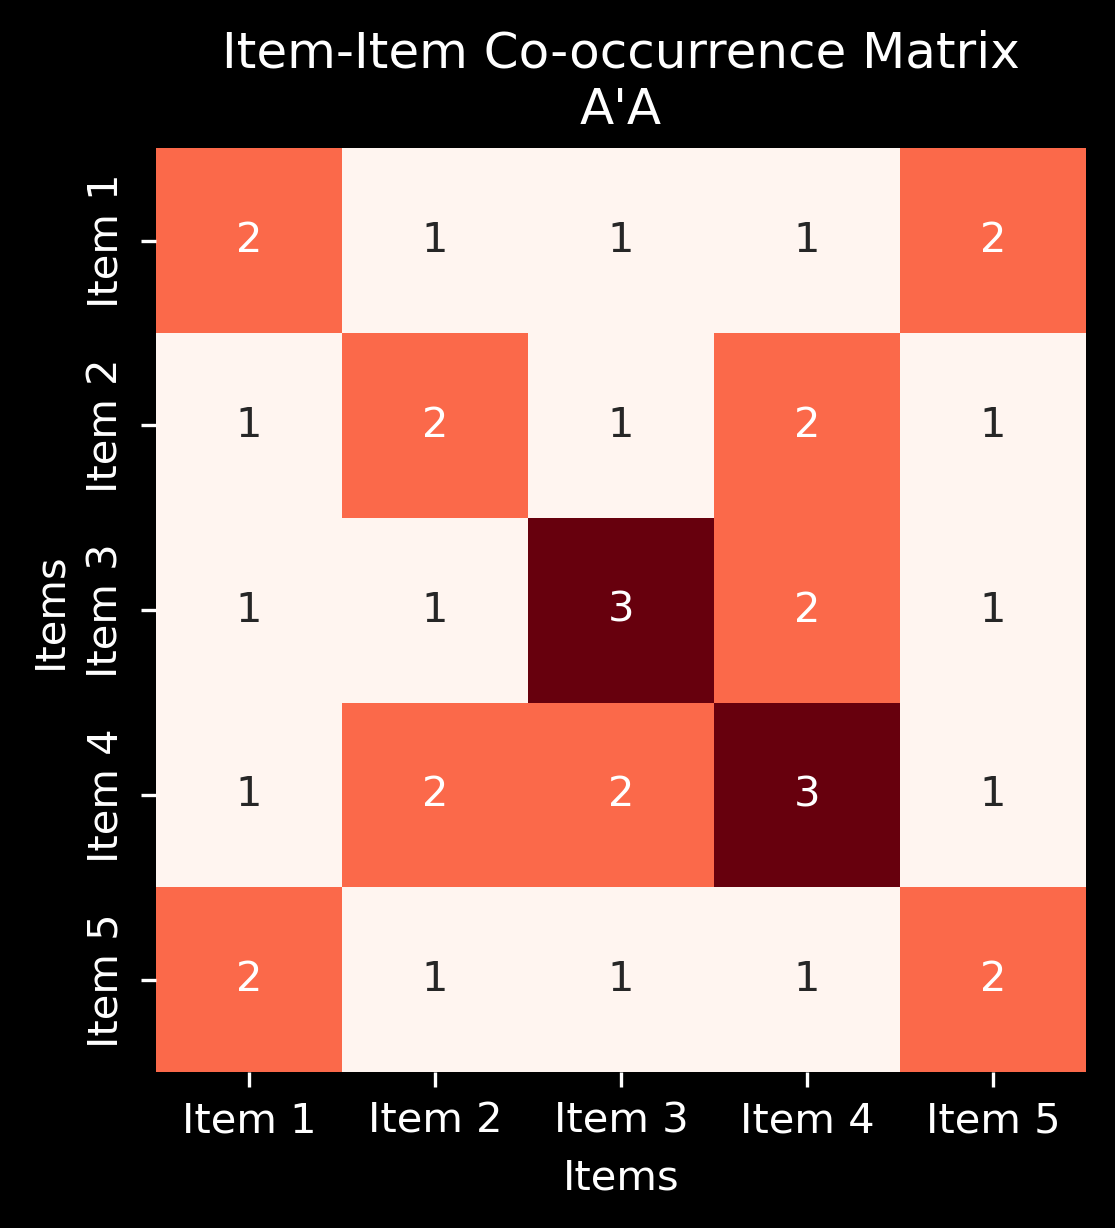

In [8]:
plt.figure(figsize=(4, 4), dpi=300)
sns.heatmap(I, annot=True, cmap="Reds", 
            xticklabels=itemlabels, 
            yticklabels=itemlabels, 
            cbar=False)

plt.title("Item-Item Co-occurrence Matrix\nA'A")
plt.xlabel("Items")
plt.ylabel("Items")
plt.show()